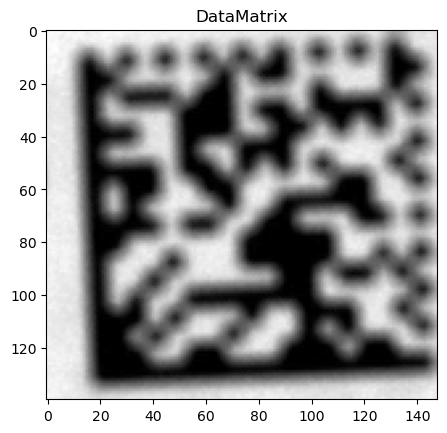

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_original = cv2.imread('img85.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img_original,cmap='gray')
plt.title('DataMatrix')
plt.show()

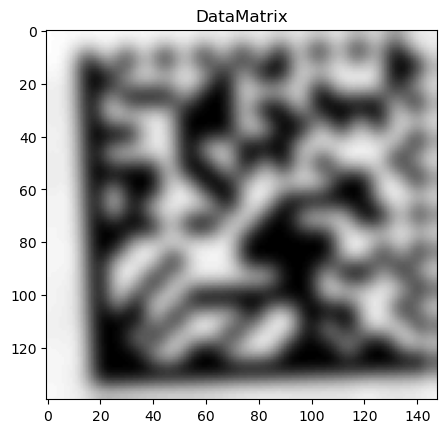

(140, 148)


In [58]:
img = cv2.bilateralFilter(img_original,11,200,90)
plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()

print(img.shape)

In [59]:
def sigma_mapping(shape):

    kerne_col  =cv2.getGaussianKernel(	shape[1], 0.9) 
    kernel_row  =cv2.getGaussianKernel(	shape[0], 0.9) 

    kerne_col /= kerne_col[0,0]
    #print("kerne_col",kerne_col)
    kernel_row /= kernel_row[0,0]
    #print("kerne_col",kerne_col)

    kernel = kernel_row @ kerne_col.T
    print(kernel.sum())
    
    kernel /= kernel.sum()
    #print(kernel)

    max  =np.amax(kernel)
    print(max) 
    kernel /= max
    


    return kernel



mean = [1,1]

cov = [[1, 1], [1, 1]] 



x = np.random.multivariate_normal(mean, cov, (10, 10))
x = x[:,:,0]
print(x.shape)
print(x)



def filter(dim,sigma):

    kernel =cv2.getGaussianKernel(	dim, sigma	) 
    kernel /= kernel[0,0]
    kernel = kernel @ kernel.T
    kernel /= kernel.sum()

  

    return kernel


   

(10, 10)
[[-0.11630441  4.1049853  -0.07361233  1.40634348  1.22536258  1.75292239
   1.06564874  1.60161887  2.05312417  0.60964015]
 [ 1.70995079  2.37802696  0.73924547  0.75886793  0.89939727  0.59902954
  -0.44524698  0.90523791  0.18604737 -1.24382755]
 [-0.40030345  0.070354    3.5238282   0.06062873  0.25102606  2.0511826
   1.29138437  1.30510327  1.56197182  0.44089763]
 [-0.48997347  1.39155675 -0.01819509  1.79782445  0.35203431  0.86633275
   1.96678275  2.12767113  1.40975194 -0.42625298]
 [-0.53502756  0.68606564 -1.33032101 -0.17090095  1.35038738  2.92261073
   1.71078711  0.05970461 -0.02986474  0.45945322]
 [ 0.71282177  0.92937726  1.01026765  0.86341493  0.02178145  1.06905551
   2.42348234  1.83724166  0.96422123  1.28705503]
 [-0.2785978   0.16064269  1.75723404 -0.66661579  2.00071191  0.47978464
   0.4417077   2.29485     1.35205318  0.78539775]
 [ 0.81519076  2.30723021  1.71716323 -0.16812772 -0.53367087  1.59069075
   0.05676222  0.67790667  0.27521513  0.52

In [60]:
import numpy as np
   
def gkern(l=10, sig=2):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    kernel = np.exp(-kernel)
    return kernel / np.sum(kernel)

kernel_image = gkern()
print(kernel_image)


kernel_image = cv2.resize(kernel_image, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)



[[0.01233608 0.01220263 0.01197035 0.01169081 0.01149309 0.01149309
  0.01169081 0.01197035 0.01220263 0.01233608]
 [0.01220263 0.01184715 0.01124411 0.01054458 0.01006684 0.01006684
  0.01054458 0.01124411 0.01184715 0.01220263]
 [0.01197035 0.01124411 0.01006684 0.00878694 0.00796543 0.00796543
  0.00878694 0.01006684 0.01124411 0.01197035]
 [0.01169081 0.01054458 0.00878694 0.00702219 0.00597296 0.00597296
  0.00702219 0.00878694 0.01054458 0.01169081]
 [0.01149309 0.01006684 0.00796543 0.00597296 0.00485226 0.00485226
  0.00597296 0.00796543 0.01006684 0.01149309]
 [0.01149309 0.01006684 0.00796543 0.00597296 0.00485226 0.00485226
  0.00597296 0.00796543 0.01006684 0.01149309]
 [0.01169081 0.01054458 0.00878694 0.00702219 0.00597296 0.00597296
  0.00702219 0.00878694 0.01054458 0.01169081]
 [0.01197035 0.01124411 0.01006684 0.00878694 0.00796543 0.00796543
  0.00878694 0.01006684 0.01124411 0.01197035]
 [0.01220263 0.01184715 0.01124411 0.01054458 0.01006684 0.01006684
  0.01054458

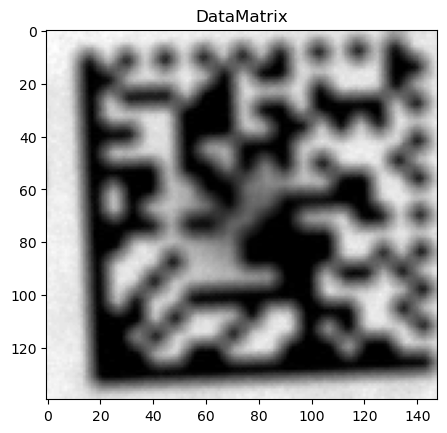

In [61]:
def generator(sigma,shape):
    
    kernel_image = gkern(sig=sigma)
    kernel_image = cv2.resize(kernel_image, dsize=(shape[1],shape[0]), interpolation=cv2.INTER_LINEAR)
    return kernel_image

h,w = img_original.shape
kernel_image = generator(1,(h,w))
img = img_original*kernel_image
plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()


0.013210625140072124


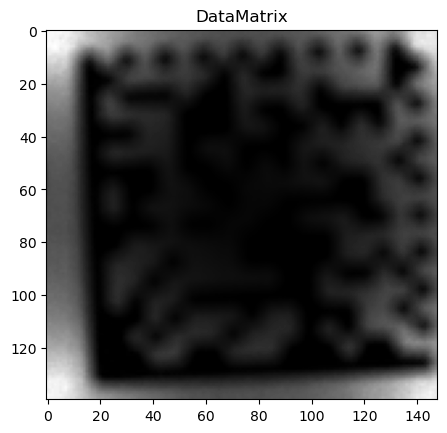

In [66]:

kernel_image = generator(5,(h,w))
img = img*kernel_image
max  =np.amax(img)
print(max) 
img /= max
#img = cv2.GaussianBlur(img,(3,3),0)
plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()

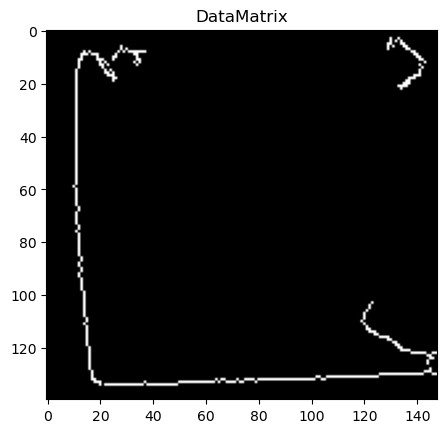

In [41]:
# Canny Edge Detection

max  =np.amax(img)
img /= max
immagine = np.uint8(255*img)
edges = cv2.Canny(image=immagine, threshold1=50, threshold2=200)

 # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges,cmap='gray')
plt.title('DataMatrix')
plt.show()





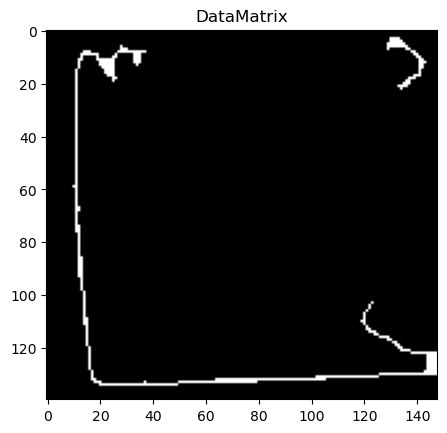

In [42]:
kernel = np.ones((5,5), np.uint8)  # note this is a horizontal kernel
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1) 

plt.imshow(edges,cmap='gray')
plt.title('DataMatrix')
plt.show()


[10583, 158]
10583
0
[[  7   6]
 [142   1]
 [147 130]
 [ 12 135]]


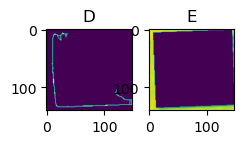

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
from urllib.request import urlopen






contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
areas = [int(cv2.contourArea(cv2.convexHull(x))) for x in contours]

print(areas)
i = np.max(areas)
print(i)
max_i = areas.index(i)
print(max_i)
d = cv2.drawContours(np.zeros_like(edges), contours, max_i, 255, 1)
plt.subplot(154); plt.title('D')
plt.imshow(d)

rect = cv2.minAreaRect(contours[max_i])
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
e = cv2.drawContours(img_original,[box],0,1,thickness=cv2.FILLED)
plt.subplot(155); plt.title('E')
plt.imshow(e)
plt.show()







In [270]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [269]:
# import the necessary packages
import numpy as np
import cv2
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

In [271]:
warped = four_point_transform(e, box)

TypeError: 'numpy.float64' object is not callable

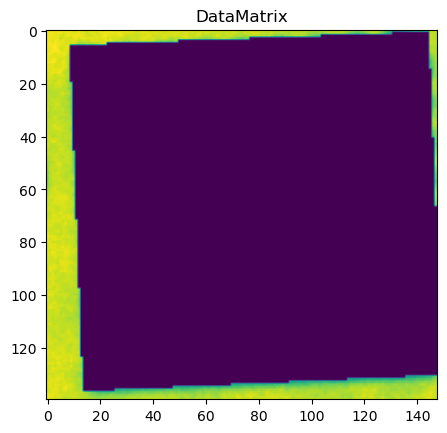

[[78 81 82 ... 75 75 75]
 [81 81 81 ... 75 75 74]
 [81 81 81 ... 77 75 74]
 ...
 [79 78 80 ... 80 78 76]
 [82 80 80 ... 79 77 77]
 [80 79 79 ... 79 77 75]]


In [267]:
plt.imshow(e)
plt.title('DataMatrix')
plt.show()

print(e)

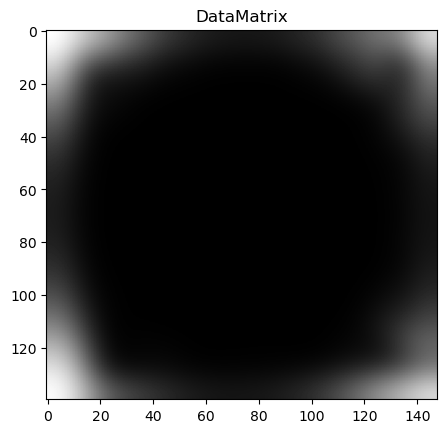

In [390]:
img = img*kernel_image
img = cv2.GaussianBlur(img,(11,11),0)
plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()

In [587]:
img_original = cv2.imread('img85.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_original,cmap='gray')
plt.title('DataMatrix')
plt.show()

SyntaxError: unexpected EOF while parsing (1922958683.py, line 4)

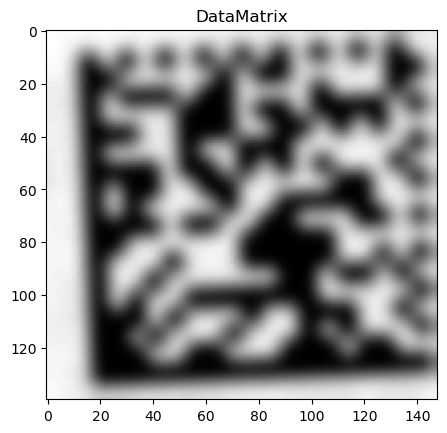

In [584]:
img_original = cv2.GaussianBlur(img_original,(11,11),0)
plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()

In [382]:

linesP = cv2.HoughLinesP(img, 1, np.pi / 180, 100, None, 5, 10)


if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    

plt.imshow(img,cmap='gray')
plt.title('DataMatrix')
plt.show()

error: OpenCV(4.5.4) /tmp/pip-req-build-9vck9bv0/opencv/modules/imgproc/src/hough.cpp:473: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'
